In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 8.0)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gray"

import nn.layers as layers
import nn.optim as optim
import nn.net as net
from nn.solver import Solver
from utils import *
from dataset import get_CIFAR10_data

# Fully-conneceted (Linear) layer
`nn/layers.py` 파일 내부에 있는 `Linear` 클래스의 `forward`와 `backward` 메소드를 주석에 명시된 요구 조건에 따라 작성하고, 아래 코드를 실행시켜 구현한 코드를 테스트한다.<br>
**NOTE**: 모든 테스트 결과는 *1e-06* 이하의 오차만 허용된다.

In [3]:
# Test the Linear.forward()
num_input, in_dims, out_dims = 3, 5, 3

linear = layers.Linear(in_dims, out_dims, init_mode="linear")
x = np.linspace(-0.1, 0.5, num=num_input*in_dims).reshape(num_input, in_dims)
out = linear.forward(x)
correct_out = np.array([[ 0.01938776,  0.01836735,  0.01734694],
                        [ 0.00408163,  0.01836735,  0.03265306],
                        [-0.01122449,  0.01836735,  0.04795918],])
print("Testing linear - forward function:")
print("error:", rel_error(out, correct_out))

Testing linear - forward function:
error: 3.2500010554504164e-07


In [4]:
# Test the Linear.backward()
num_input, in_dims, out_dims = 10, 6, 5

linear = layers.Linear(in_dims, out_dims, init_mode="normal")
x = np.linspace(-0.1, 0.5, num=num_input*in_dims).reshape(num_input, in_dims)
dout = np.random.randn(num_input, out_dims)

dx_num = eval_numerical_gradient_array(lambda x: linear.forward(x), x, dout)
dw_num = eval_numerical_gradient_array(lambda w: linear.forward(x), linear.params["w"], dout)
db_num = eval_numerical_gradient_array(lambda b: linear.forward(x), linear.params["b"], dout)

out = linear.forward(x)
linear.backward(dout)

dx, dw, db = linear.grads["x"], linear.grads["w"], linear.grads["b"]
print("Testing linear - backward function:")
print("dx error:", rel_error(dx, dx_num))
print("dw error:", rel_error(dw, dw_num))
print("db error:", rel_error(db, db_num))

Testing linear - backward function:
dx error: 2.9006185304694105e-11
dw error: 7.359191305603502e-14
db error: 1.7697383171667528e-14


# Activation functions
`nn/layers.py` 파일 내부에 있는 `ReLU`, `Sigmoid`, `Tanh` 클래스의 `forward` 및 `backward` 메소드를 주석에 명시된 요구 조건에 따라 작성하고, 아래 코드를 실행시켜 구현한 코드를 테스트한다.<br>
**NOTE**: 모든 테스트 결과는 *1e-06* 이하의 오차만 허용된다.

In [5]:
# Test the ReLU.forward()
relu = layers.ReLU()
x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)
out = relu.forward(x)
correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                        [ 0.,          0.,          0.04545455,  0.13636364,],
                        [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])
print(out)
print("Testing ReLU - forward function:")
print("error:", rel_error(out, correct_out))

# Test the ReLU.backward()
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)
#dx_num = 정답
dx_num = eval_numerical_gradient_array(lambda x: relu.forward(x), x, dout)
print(dx_num)
print("=====")
#relu backward
#dx = dout*(x>=0)
#print(dx)
#
relu.forward(x)
dx = relu.backward(dout)
print(dx)
print("\nTesting ReLU - backward function:")
print("dx error:", rel_error(dx, dx_num))
      
      
      

[[0.         0.         0.         0.        ]
 [0.         0.         0.04545455 0.13636364]
 [0.22727273 0.31818182 0.40909091 0.5       ]]
Testing ReLU - forward function:
error: 4.999999798022158e-08
[[-0.33198659  0.14787065 -0.58329014 -1.34714746  0.          0.
   0.         -0.86745632  0.43019863  0.        ]
 [ 0.          0.          0.35802573  0.         -2.21891515  0.
   0.85228811  0.          0.21788199  0.        ]
 [ 0.46424204  0.76702075  0.         -0.61118824  0.          0.
   0.          1.2691948  -0.84762587  0.        ]
 [-1.04125023 -0.61616513  0.          1.43026688 -1.78394154  0.81051
   0.          0.          0.          0.        ]
 [ 0.          1.38385535 -1.45557521  0.         -0.42670251  0.63441032
   0.          0.13712182  0.          0.        ]
 [ 0.          0.          0.          2.07823607 -0.87226877  0.
   1.06657022  0.          0.         -1.21581914]
 [ 1.41799929 -0.94967938  0.          0.          0.          2.75389609
   0.  

In [6]:
# Test the Sigmoid.forward()
sigmoid = layers.Sigmoid()
x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out = sigmoid.forward(x)
#sigmoid forward
#out = 1/(1+np.exp(-x))
correct_out = np.array([[0.37754067, 0.39913012, 0.42111892, 0.44342513],
                        [0.46596182, 0.48863832, 0.51136168, 0.53403818],
                        [0.55657487, 0.57888108, 0.60086988, 0.62245933],])

print("Testing Sigmoid - forward function:")
print("error:", rel_error(out, correct_out))

# Test the Sigmoid.backward()
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: sigmoid.forward(x), x, dout)


sigmoid.forward(x)
dx = sigmoid.backward(dout)

print("\nTesting Sigmoid - backward function:")
print("dx error:", rel_error(dx, dx_num))

Testing Sigmoid - forward function:
error: 5.157221295671855e-09

Testing Sigmoid - backward function:
dx error: 4.725006453972426e-11


In [7]:
# Test the Tanh.forward()
tanh = layers.Tanh()
x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out = tanh.forward(x)
#out = (np.exp(2*x)-1)/(np.exp(2*x)+1)
correct_out = np.array([[-0.46211716, -0.38770051, -0.30786199, -0.22343882],
                        [-0.13552465, -0.04542327,  0.04542327,  0.13552465],
                        [ 0.22343882,  0.30786199,  0.38770051,  0.46211716],])

print("Testing Tanh - forward function:")
print("error:", rel_error(out, correct_out))

# Test the Tanh.backward()

x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: tanh.forward(x), x, dout)


tanh.forward(x)
dx = tanh.backward(dout)
print("\nTesting Tanh - backward function:")
print("dx error:", rel_error(dx, dx_num))

Testing Tanh - forward function:
error: 3.829228839233979e-08

Testing Tanh - backward function:
dx error: 7.898396238693948e-11


# Loss layer: Softmax-CrossEntropy
`nn/layers.py` 파일 내부에 있는 `SoftmaxCELoss` 클래스의 `forward` 메소드를 주석에 명시된 요구 조건에 따라 작성하고, 아래 코드를 실행시켜 구현한 코드를 테스트한다.<br>
주의: 구현의 편의성을 위해 별도의 `backward` 메소드 없이 `forward` 함수 내부에서 loss와 gradient를 계산하도록 되어있다.<br>
**NOTE**: 모든 테스트 결과는 *1e-06* 이하의 오차만 허용된다.

In [8]:
num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)


ce = layers.SoftmaxCELoss()

dx_num = eval_numerical_gradient(lambda x: ce.forward(x, y)[0], x, verbose=False)
loss, dx = ce.forward(x, y)
print("Testing softmax loss:")
print("loss:", loss, " (must be around 2.3)")
print("dx error:", rel_error(dx, dx_num))

Testing softmax loss:
loss: 2.3028730264759103  (must be around 2.3)
dx error: 8.106955425016349e-09


# Two-layer Network
이전까지 구현한 모듈들을 조합하여 레이어 2개짜리 네트워크를 작성한다. `nn/net.py` 파일에 있는 `TwoLayerNet` 클래스의 생성자 및 `loss` 함수를 구현한 뒤, 아래 코드를 실행하여 테스트 한다.<br>
**NOTE**: 모든 테스트 결과는 *1e-06* 이하의 오차만 허용된다.

In [9]:
N, D, H, C = 3, 5, 50, 7
X = np.linspace(-5.5, 4.5, num=N*D).reshape(D, N).T
y = np.asarray([0, 5, 1])

mynet = net.TwoLayerNet(D, H, C)
mynet.modules["linear1"].params["w"] = np.linspace(-0.7, 0.3, num=D*H).reshape(D, H)
mynet.modules["linear1"].params["b"] = np.linspace(-0.1, 0.9, num=H)
mynet.modules["linear2"].params["w"] = np.linspace(-0.3, 0.4, num=H*C).reshape(H, C)
mynet.modules["linear2"].params["b"] = np.linspace(-0.9, 0.1, num=C)

scores = mynet.loss(X)
correct_scores = np.asarray(
  [[11.53165108,  12.2917344,   13.05181771,  13.81190102,  14.57198434, 15.33206765,  16.09215096],
   [12.05769098,  12.74614105,  13.43459113,  14.1230412,   14.81149128, 15.49994135,  16.18839143],
   [12.58373087,  13.20054771,  13.81736455,  14.43418138,  15.05099822, 15.66781506,  16.2846319 ]])
correct_loss = 3.4702243556

print("Testing TwoLayerNet:")
print("score error:", np.abs(scores - correct_scores).sum())

loss = mynet.loss(X, y)
print("loss error:", np.abs(loss - correct_loss))

loss = mynet.loss(X, y)
f = lambda _: mynet.loss(X, y)
grad_w2 = eval_numerical_gradient(f, mynet.modules["linear2"].params["w"], verbose=False)
grad_b2 = eval_numerical_gradient(f, mynet.modules["linear2"].params["b"], verbose=False)
grad_w1 = eval_numerical_gradient(f, mynet.modules["linear1"].params["w"], verbose=False)
grad_b1 = eval_numerical_gradient(f, mynet.modules["linear1"].params["b"], verbose=False)

print()
print("grad_w2 error:", rel_error(grad_w2, mynet.modules["linear2"].grads["w"]))
print("grad_b2 error:", rel_error(grad_b2, mynet.modules["linear2"].grads["b"]))
print("grad_w1 error:", rel_error(grad_w1, mynet.modules["linear1"].grads["w"]))
print("grad_b1 error:", rel_error(grad_b1, mynet.modules["linear1"].grads["b"]))

Testing TwoLayerNet:
score error: 5.1158512093252284e-08
loss error: 4.6100900874535e-12

grad_w2 error: 9.866947663499871e-07
grad_b2 error: 3.07701795131934e-08
grad_w1 error: 1.6072515124187046e-08
grad_b1 error: 9.765162896865e-09


# Solver and train the network
위에서 작성한 2-레이어 네트워크를 학습한다. 네트워크의 학습을 CIFAR-10 데이터를 사용하여 (`dataset.py` 참조), `nn.Solver` 파일의 `Solver` 클래스에 의해 학습이 진행된다. 대부분의 코드가 미리 작성되었기 때문에  `nn.Solver` 파일의 클래스의 API를 참조하여 아래 **TODO** 부분을 작성한다. **TODO** 부분은 네트워크 하이퍼파라미터 세팅에 관한 코드가 들어가야 하며, validation set에 대해 **50%** 이상의 성능을 보여야 한다.

In [10]:
# Load the (preprocessed) CIFAR10 data.
data = get_CIFAR10_data()
for k, v in data.items():
    print(k, v.shape)

X_train (49000, 3, 32, 32)
y_train (49000,)
X_val (1000, 3, 32, 32)
y_val (1000,)
X_test (1000, 3, 32, 32)
y_test (1000,)


Epoch 0/70
  Loss: 2.303
  Train accuracy: 0.113
  Val accuracy: 0.080
Epoch 1/70
  Loss: 1.882
  Train accuracy: 0.267
  Val accuracy: 0.280
Epoch 2/70
  Loss: 1.685
  Train accuracy: 0.356
  Val accuracy: 0.358
Epoch 3/70
  Loss: 1.750
  Train accuracy: 0.396
  Val accuracy: 0.400
Epoch 4/70
  Loss: 1.647
  Train accuracy: 0.423
  Val accuracy: 0.416
Epoch 5/70
  Loss: 1.535
  Train accuracy: 0.438
  Val accuracy: 0.445
Epoch 6/70
  Loss: 1.506
  Train accuracy: 0.474
  Val accuracy: 0.465
Epoch 7/70
  Loss: 1.543
  Train accuracy: 0.489
  Val accuracy: 0.476
Epoch 8/70
  Loss: 1.250
  Train accuracy: 0.506
  Val accuracy: 0.476
Epoch 9/70
  Loss: 1.470
  Train accuracy: 0.501
  Val accuracy: 0.482
Epoch 10/70
  Loss: 1.139
  Train accuracy: 0.534
  Val accuracy: 0.494
Epoch 11/70
  Loss: 1.236
  Train accuracy: 0.547
  Val accuracy: 0.495
Epoch 12/70
  Loss: 1.490
  Train accuracy: 0.555
  Val accuracy: 0.514
Epoch 13/70
  Loss: 1.172
  Train accuracy: 0.545
  Val accuracy: 0.522
Ep

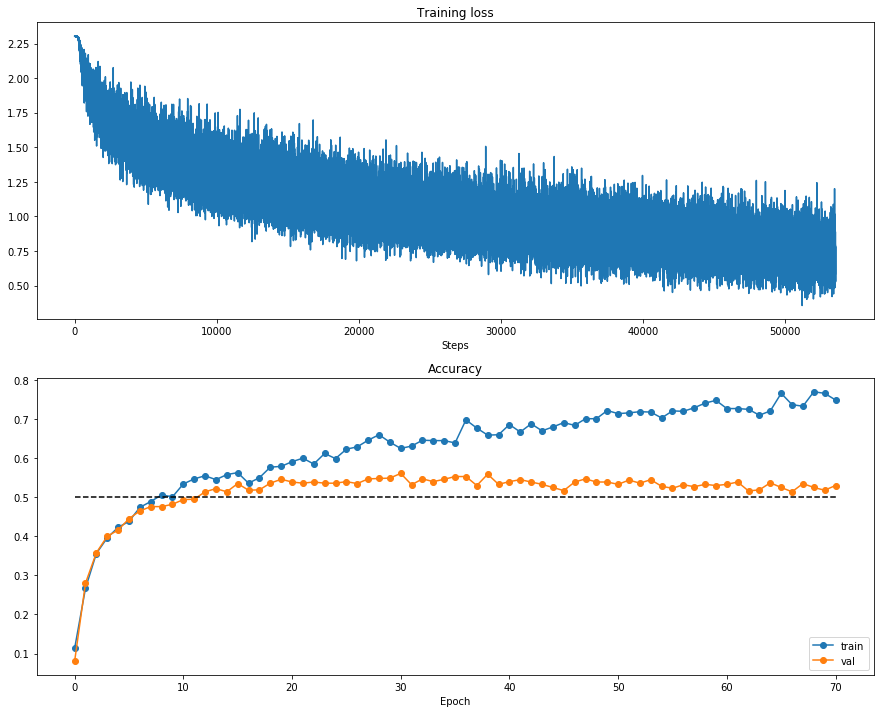

In [11]:
model = net.TwoLayerNet(init_mode="normal", init_scale=0.001)
solver = Solver(model=model, data=data, optim_config={'lr': 0.025}, num_epochs=70)

######################################################################
# TODO: Use a Solver instance to train a TwoLayerNet that achieves   #
# at least **50%** accuracy on the validation set.                   #
######################################################################

######################################################################
#                          END OF YOUR CODE                          #
######################################################################
solver.train()

# plot results
plt.subplot(2, 1, 1)
plt.title("Training loss")
plt.plot(solver.loss_history, "-")
plt.xlabel("Steps")

plt.subplot(2, 1, 2)
plt.title("Accuracy")
plt.plot(solver.train_acc_history, "-o", label="train")
plt.plot(solver.val_acc_history, "-o", label="val")
plt.plot([0.5] * len(solver.val_acc_history), "k--")
plt.xlabel("Epoch")
plt.legend(loc="lower right")
plt.gcf().set_size_inches(15, 12)
plt.show()

# Multi-layer network
이제 `nn/net.py`의 `FCNet` 클래스의 빈칸을 작성하여, 레이어가 여러 개인 네트워크를 디자인한다. 이 때, 임의의 레이어 개수를 입력으로 받도록 for loop를 사용해서 네트워크를 구성하고 forward/backward 연산을 수행해야만 한다. 그 후, 네트워크를 테스트하고 (numerical 이슈에 의해 상대 오차가 비교적 클 가능성이 있으므로, 테스트 코드를 반복 실행하여 바뀌는 오차를 확인한다.) `TwoLayerNet` 과 동일한 하이퍼파라미터를 사용하여 네트워크를 학습한다.<br>
**주의**: 성능이 낮게 나오는 것이 정상이므로 여기서 별도의 하이퍼파라미터 튜닝을 진행하지 않는다.

In [12]:
N, D, H1, H2, C = 2, 15, 20, 30, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))

model = net.FCNet(
    input_dim=D, num_classes=C,
    hidden_dims=[H1, H2],
    init_scale=5e-2, init_mode="normal"
)

loss = model.loss(X, y)
print("Initial loss:", loss)

for module_name in model.modules.keys():
    if not model.modules[module_name].params:
        continue
        
    w = model.modules[module_name].params["w"]
    b = model.modules[module_name].params["b"]
    dw = model.modules[module_name].grads["w"]
    db = model.modules[module_name].grads["b"]
    
    f = lambda _: model.loss(X, y)
    grad_w = eval_numerical_gradient(f, w, verbose=False, h=1e-5)
    grad_b = eval_numerical_gradient(f, b, verbose=False, h=1e-5)

    print("{}_w error: {:e}".format(module_name, rel_error(dw, grad_w)))
    print("{}_b error: {:e}".format(module_name, rel_error(db, grad_b)))

Initial loss: 2.3025850825432874
linear1_w error: 1.275900e-03
linear1_b error: 1.701095e-05
linear2_w error: 1.728915e-02
linear2_b error: 1.000000e+00
linear3_w error: 1.000000e+00
linear3_b error: 6.202719e-09


Epoch 0/70
  Loss: 2.303
  Train accuracy: 0.100
  Val accuracy: 0.079
Epoch 1/70
  Loss: 2.300
  Train accuracy: 0.088
  Val accuracy: 0.105
Epoch 2/70
  Loss: 2.303
  Train accuracy: 0.102
  Val accuracy: 0.112
Epoch 3/70
  Loss: 2.304
  Train accuracy: 0.095
  Val accuracy: 0.112
Epoch 4/70
  Loss: 2.302
  Train accuracy: 0.104
  Val accuracy: 0.112
Epoch 5/70
  Loss: 2.302
  Train accuracy: 0.107
  Val accuracy: 0.107
Epoch 6/70
  Loss: 2.304
  Train accuracy: 0.101
  Val accuracy: 0.078
Epoch 7/70
  Loss: 2.304
  Train accuracy: 0.100
  Val accuracy: 0.079
Epoch 8/70
  Loss: 2.302
  Train accuracy: 0.101
  Val accuracy: 0.098
Epoch 9/70
  Loss: 2.304
  Train accuracy: 0.105
  Val accuracy: 0.078
Epoch 10/70
  Loss: 2.303
  Train accuracy: 0.094
  Val accuracy: 0.107
Epoch 11/70
  Loss: 2.304
  Train accuracy: 0.105
  Val accuracy: 0.078
Epoch 12/70
  Loss: 2.301
  Train accuracy: 0.090
  Val accuracy: 0.102
Epoch 13/70
  Loss: 2.300
  Train accuracy: 0.100
  Val accuracy: 0.113
Ep

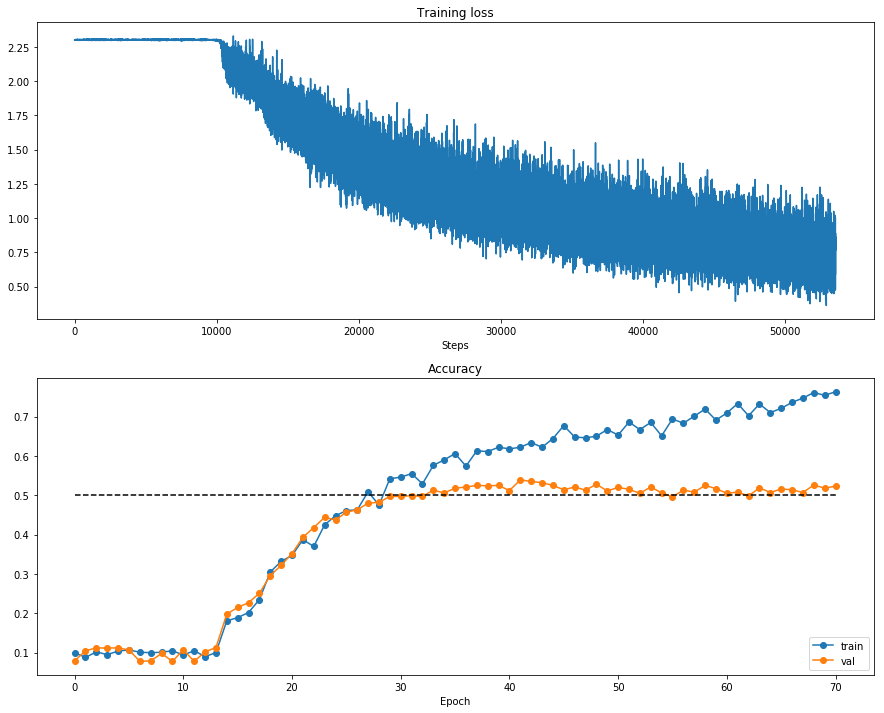

In [13]:
model = net.FCNet(
    hidden_dims=[100, 100],
    init_scale=0.001, init_mode="normal"
)
solver = Solver(model=model, data=data, optim_config={'lr': 0.025}, num_epochs=70)

######################################################################
# TODO: Use the same solver settings that used when training         #
# TwoLayerNet model                                                  #
######################################################################

######################################################################
#                          END OF YOUR CODE                          #
######################################################################
solver.train()

# plot results
plt.subplot(2, 1, 1)
plt.title("Training loss")
plt.plot(solver.loss_history, "-")
plt.xlabel("Steps")

plt.subplot(2, 1, 2)
plt.title("Accuracy")
plt.plot(solver.train_acc_history, "-o", label="train")
plt.plot(solver.val_acc_history, "-o", label="val")
plt.plot([0.5] * len(solver.val_acc_history), "k--")
plt.xlabel("Epoch")
plt.legend(loc="lower right")
plt.gcf().set_size_inches(15, 12)
plt.show()

# Better initialization
지금까지는 네트워크의 weight를 std=0.001인 가우시안 분포를 사용하여 초기화 하였다 (`nn/init.py`의 `_normal_init` 함수 참조). 하지만 이 초기화 방법은 위와 같이 레이어를 깊게 쌓은 경우 성능을 올리기가 매우 어렵다는 단점이 있다. 이를 해결하고자 Xavier [1], He [2] 초기화 방법이 제안되었다.<br>
아래 코드를 실행시켜보고 문제에 대해 답을 서술해보자.

[1] Glorot, Xavier, and Yoshua Bengio. "Understanding the difficulty of training deep feedforward neural networks." ICAIS 2010.<br>
[2] He, Kaiming, et al. "Delving deep into rectifiers: Surpassing human-level performance on imagenet classification." ICCV 2015.

## Question:
1. std=0.001인 가우시안 분포로 네트워크의 weight를 초기화한 모델의 학습이 되지 않는 이유가 무엇일까?
2. He 초기화 방법은 가우시안 분포 초기화 어떤 장점을 가지고 있을까?


## Answer:
1. 
초기값을 모두 0으로 설정하면 SGD에서 모든 가중치의 값이 똑같이 갱신되기 때문에 학습이 올바르게 이뤄지지 않는다. 처음에 우리는 (std=0.001인 가우시안 분포) 표준편차가 1인 정규분포를 사용하여 초기값을 설정하였다. 이것은 sigmoid 함수의 출력값이 0과 1에 치우치는 현상이 발생하게 된다. 출력값이 0과 1에 치우치면 gradient는 0에 가까운 값을 갖게 되고 이는 Gradient Vanishing 현상의 원인이 된다.
신경망이 깊어지면 가중치들의 작은 변화가 큰 변화로 이어지는 불안정한 현상들이 생긴다. 이를 해결하기 위해서 Xavier와 He 방법이 있다.
2. 발전된 방법 : Xavier
Gradient Vanishing 현상을 완화 하기 위해서 가중치를 초기화 할 때 Sigmoid 와 같은 S 자 함수의 경우 가장 중요한 것은 출력값들이 표준 정규 분포 형태를 갖게 하는 것이다. 출력값들이 표준 정규 분포 형태를 갖게 되어야 안정적으로 학습이 가능하기 때문이다.Xavier 초기화 방법은 표준 정규 분포를 입력 개수의 표준 편차로 나누어주면 된다. 하지만 ReLu함수와 결합했을 때는 출력삽이 0으로 수렴하고 평균과 표준편차 모두 0으로 수렴한다. 즉, Xavier 초기화 방법을 사용할 수 없다는 것이다.
3. ReLu에 사용하는 초기화 : He
ReLU 함수에 맞는 초기화 법은 He Initialization 이다. He Initialization 은 Xavier Initialization 과 크게 다르지 않다. 단순히 인풋 개수의 절반의 제곱근으로 나누어주면 된다. 

Sigmoid 나 Tanh 를 사용할 경우에는 Xavier 초기화를 ReLU 를 사용할 경우에는 He 초기화를 사용하시면 됩니다.

Epoch 0/70
  Loss: 2.308
  Train accuracy: 0.122
  Val accuracy: 0.124
Epoch 1/70
  Loss: 1.414
  Train accuracy: 0.431
  Val accuracy: 0.439
Epoch 2/70
  Loss: 1.363
  Train accuracy: 0.469
  Val accuracy: 0.455
Epoch 3/70
  Loss: 1.337
  Train accuracy: 0.527
  Val accuracy: 0.481
Epoch 4/70
  Loss: 1.484
  Train accuracy: 0.531
  Val accuracy: 0.482
Epoch 5/70
  Loss: 1.313
  Train accuracy: 0.552
  Val accuracy: 0.504
Epoch 6/70
  Loss: 1.200
  Train accuracy: 0.576
  Val accuracy: 0.510
Epoch 7/70
  Loss: 1.080
  Train accuracy: 0.591
  Val accuracy: 0.512
Epoch 8/70
  Loss: 1.039
  Train accuracy: 0.601
  Val accuracy: 0.510
Epoch 9/70
  Loss: 1.136
  Train accuracy: 0.589
  Val accuracy: 0.528
Epoch 10/70
  Loss: 1.023
  Train accuracy: 0.599
  Val accuracy: 0.514
Epoch 11/70
  Loss: 1.239
  Train accuracy: 0.610
  Val accuracy: 0.515
Epoch 12/70
  Loss: 1.329
  Train accuracy: 0.621
  Val accuracy: 0.516
Epoch 13/70
  Loss: 0.946
  Train accuracy: 0.654
  Val accuracy: 0.510
Ep

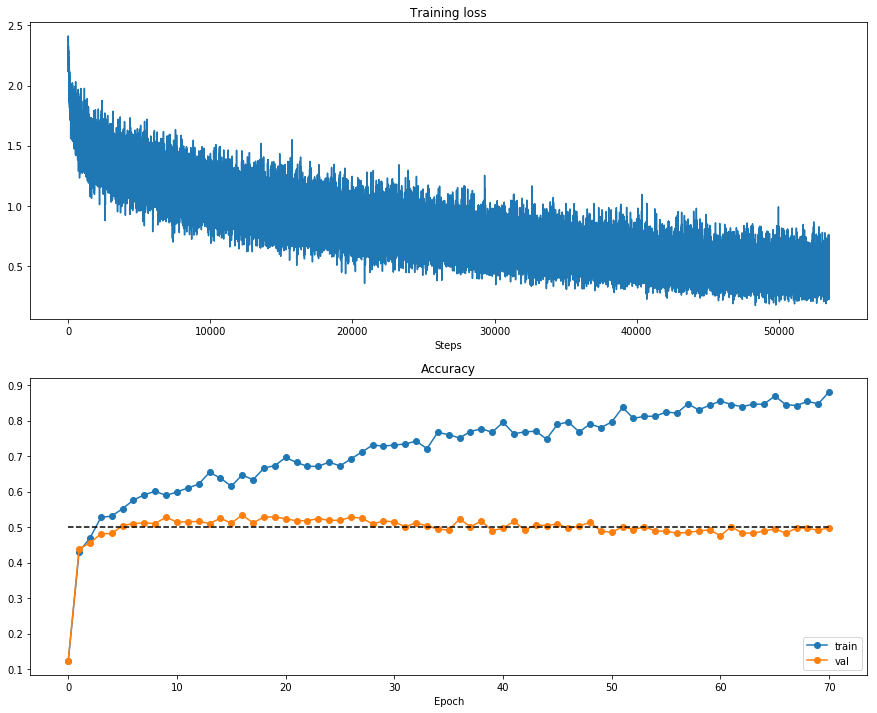

In [14]:
model = net.FCNet(
    hidden_dims=[100, 100],
    init_mode="he" # or use xavier
)
solver = Solver(model=model, data=data, optim_config={'lr': 0.025}, num_epochs=70)

######################################################################
# TODO: Use the same solver settings that used when training         #
# TwoLayerNet model                                                  #
######################################################################

######################################################################
#                          END OF YOUR CODE                          #
######################################################################
solver.train()

# plot results
plt.subplot(2, 1, 1)
plt.title("Training loss")
plt.plot(solver.loss_history, "-")
plt.xlabel("Steps")

plt.subplot(2, 1, 2)
plt.title("Accuracy")
plt.plot(solver.train_acc_history, "-o", label="train")
plt.plot(solver.val_acc_history, "-o", label="val")
plt.plot([0.5] * len(solver.val_acc_history), "k--")
plt.xlabel("Epoch")
plt.legend(loc="lower right")
plt.gcf().set_size_inches(15, 12)
plt.show()